In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data_df = pd.read_csv("Documents/Hands-On-Artificial-Intelligence-for-Cybersecurity-master/Chapter01/datasets/clustering.csv")

In [3]:
data_df.describe()

,178,13,class_0,class_1,class_2
count,178.000000,178.000000,178.000000,178.000000,178.000000
mean,5.058090,0.957449,2.611685,746.893258,0.938202
std,2.318286,0.228572,0.709990,314.907474,0.775035
min,1.280000,0.480000,1.270000,278.000000,0.000000
25%,3.220000,0.782500,1.937500,500.500000,0.000000
50%,4.690000,0.965000,2.780000,673.500000,1.000000
75%,6.200000,1.120000,3.170000,985.000000,2.000000
max,13.000000,1.710000,4.000000,1680.000000,2.000000


In [4]:
X_data = data_df.drop('class_1', axis=1)
y_data = data_df['class_1']

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)

In [7]:
pca.fit(X_data)

PCA(n_components=2)

In [8]:
X_2D = pca.transform(X_data)

In [9]:
data_df['PCA1'] = X_2D[:, 0]
data_df['PCA2'] = X_2D[:, 1]

In [10]:
from sklearn.mixture import GaussianMixture

In [11]:
gm = GaussianMixture(n_components=3, covariance_type='full')

In [12]:
gm.fit(X_data)

GaussianMixture(n_components=3)

In [13]:
y_gm = gm.predict(X_data)
y_gm

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [14]:
data_df['cluster'] = y_gm

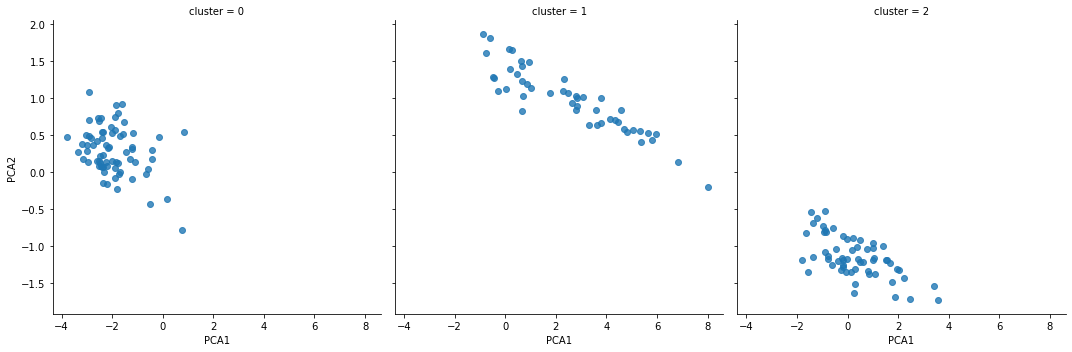

In [15]:
sns.lmplot("PCA1", "PCA2", data=data_df, col='cluster', fit_reg=False)